<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pooling-coefficients-measured-in-saline" data-toc-modified-id="Pooling-coefficients-measured-in-saline-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Pooling coefficients measured in saline</a></span><ul class="toc-item"><li><span><a href="#Measure-the-amplitude-of-the-sine-signal-on-each-site-under-different-conditions" data-toc-modified-id="Measure-the-amplitude-of-the-sine-signal-on-each-site-under-different-conditions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Measure the amplitude of the sine signal on each site under different conditions</a></span></li><li><span><a href="#Compute-the-pooling-coefficients" data-toc-modified-id="Compute-the-pooling-coefficients-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Compute the pooling coefficients</a></span></li><li><span><a href="#Identify-sites-with-defective-switches" data-toc-modified-id="Identify-sites-with-defective-switches-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Identify sites with defective switches</a></span></li><li><span><a href="#Plot-the-pooling-coefficients-at-the-good-sites" data-toc-modified-id="Plot-the-pooling-coefficients-at-the-good-sites-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Plot the pooling coefficients at the good sites</a></span><ul class="toc-item"><li><span><a href="#Figure-4D" data-toc-modified-id="Figure-4D-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Figure 4D</a></span></li></ul></li></ul></li><li><span><a href="#Electrical-characteristics-measured-in-saline" data-toc-modified-id="Electrical-characteristics-measured-in-saline-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Electrical characteristics measured in saline</a></span><ul class="toc-item"><li><span><a href="#Load-raw-Neuropixel-recordings-and-compute-power-spectra" data-toc-modified-id="Load-raw-Neuropixel-recordings-and-compute-power-spectra-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load raw Neuropixel recordings and compute power spectra</a></span></li><li><span><a href="#Fit-a-4-parameter-circuit-model-to-the-noise-spectra" data-toc-modified-id="Fit-a-4-parameter-circuit-model-to-the-noise-spectra-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Fit a 4-parameter circuit model to the noise spectra</a></span></li><li><span><a href="#Examples-of-noise-measurements-and-fits-from-the-circuit-model" data-toc-modified-id="Examples-of-noise-measurements-and-fits-from-the-circuit-model-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Examples of noise measurements and fits from the circuit model</a></span><ul class="toc-item"><li><span><a href="#Figure-4B-left" data-toc-modified-id="Figure-4B-left-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Figure 4B left</a></span></li><li><span><a href="#Figure-4B-right" data-toc-modified-id="Figure-4B-right-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Figure 4B right</a></span></li></ul></li><li><span><a href="#Noise-in-the-highest-saline,-bank-1-vs-bank-2" data-toc-modified-id="Noise-in-the-highest-saline,-bank-1-vs-bank-2-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Noise in the highest saline, bank 1 vs bank 2</a></span><ul class="toc-item"><li><span><a href="#Figure-4C" data-toc-modified-id="Figure-4C-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Figure 4C</a></span></li></ul></li><li><span><a href="#Histograms-of-the-parameters-in-the-circuit-model" data-toc-modified-id="Histograms-of-the-parameters-in-the-circuit-model-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Histograms of the parameters in the circuit model</a></span><ul class="toc-item"><li><span><a href="#Figure-8B" data-toc-modified-id="Figure-8B-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Figure 8B</a></span></li></ul></li></ul></li></ul></div>

In [1]:
# Imports
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.optimize import minimize
import sys

module_path = 'code/' 
if module_path not in sys.path:
    sys.path.append(module_path)
from MM_Plot_Utils import plot, hist

%matplotlib inline
%reload_ext autoreload
%autoreload 2

# Pooling coefficients measured in saline

## Measure the amplitude of the sine signal on each site under different conditions
- Neuropixels probe 2 or 3
- Frequency 400 Hz or 1000 Hz
- Gradient from bottom or top
- switch settings: split 0, split 1, pooled 01

This code is provided for reference only. The raw data are not included because too voluminous. The routine simply measures the Fourier amplitude of the signal at the frequency of stimulation and saves that to file. The output files for probe 2 are included with this repo.

In [2]:
# # Compute peak amplitude of fourier transform for all sites from raw data
# # Load data directly from the external drive
# def getFourierAmplitude(probe,freq,grad,bank,dur=5):
#     '''
#     probe in ['2','3']
#     freq in ['400','1000']
#     grad in ['bot','top']
#     bank in ['0','1','01']
#     dur = duration in seconds
#     '''
#     file=getFileName(probe,freq,grad,bank)
#     binFullPath=Path(file)
#     meta=readMeta(binFullPath) # get metadata
#     rawData = makeMemMapRaw(binFullPath, meta)
#     sRate=SampRate(meta) # get sampling rate (in Hz)

#     tStart=10        # in seconds
#     tEnd=tStart+dur
#     m=int(freq)*(tEnd-tStart) # location of the frequency of stimulation in the fourier transform

#     fa=np.zeros(384)
#     for i in range(384):
#         chanList = [i] # channels to load
#         selectData = rawData[chanList,int(tStart*sRate):int(tEnd*sRate)]
#         if meta['typeThis'] == 'imec':
#             convData = 1e3*GainCorrectIM(selectData, chanList, meta) # apply gain correction and convert to mV
#         x=convData[0]
#         fa[i]=np.abs(np.fft.rfft(x))[m]
#     with open('Probe'+probe+'/FA_p'+probe+'_f'+freq+'_g'+grad+'_b'+bank, "wb") as f: 
#         pickle.dump(fa,f)
#     return fa

In [3]:
# # Analyze and save all fourier amplitudes
# for probe in ['2','3']:
#     for freq in ['400','1000']:
#         for grad in ['bot','top']:
#             for bank in ['0','1','01']:
#                 getFourierAmplitude(probe,freq,grad,bank,dur=5)

## Compute the pooling coefficients


We applied an oscillating electric field (1000 Hz) along the electrode array with a pair of annular electrodes (Figure 4A). From the recorded waveform we estimated the signal amplitude by the Fourier coefficient at the stimulus frequency. Two different field gradients (called A and B) yielded two sets of measurements, each in the two split modes ($U_{0,\rm{A}},U_{1,\rm{A}},U_{0,\rm{B}},U_{1,\rm{B}}$) and the pooled mode ($U_{\rm{P},\rm{A}},U_{\rm{P},\rm{B}}$). For each of the 383 wires we estimated the pooling coefficients of its two electrodes by solving

\begin{align*}\label{eq:saline_pc}
    \begin{bmatrix}
        U_{0,\textrm{A}} & U_{1,\textrm{A}}\\
        U_{0,\textrm{B}} & U_{1,\textrm{B}}
    \end{bmatrix}
    \begin{bmatrix}
        k_0\\
        k_1
    \end{bmatrix}
    = 
    \begin{bmatrix}
        U_{\textrm{P},\textrm{A}}\\
        U_{\textrm{P},\textrm{B}}
    \end{bmatrix}
\end{align*}

These mixing coefficients $k_0$ and $k_1$ express the recorded amplitude $U_{\textrm{P}}$ in terms of the recorded amplitudes $U_0$ and $U_1$,

\begin{align}\label{eq:V_pool_saline}
U_{\rm{P}}=k_0 U_0 + k_1 U_1
\end{align}



In [4]:
def FAname(probe,freq,grad,bank):
    '''
    returns the file name for fourier amplitudes 
    probe in ['2','3']
    freq in ['400','1000']
    grad in ['bot','top']
    bank in ['0','1','01']
    '''
    return 'data/Probe'+probe+'/FA_p'+probe+'_f'+freq+'_g'+grad+'_b'+bank

In [5]:
# compute pooling coefficients for a given probe, frequency
def getPC(probe,freq):
    with open(FAname(probe,freq,'top','0'), "rb") as f: 
        dt0=pickle.load(f)
    with open(FAname(probe,freq,'top','1'), "rb") as f: 
        dt1=pickle.load(f)
    with open(FAname(probe,freq,'top','01'), "rb") as f: 
        dt01=pickle.load(f)
    with open(FAname(probe,freq,'bot','0'), "rb") as f: 
        db0=pickle.load(f)
    with open(FAname(probe,freq,'bot','1'), "rb") as f: 
        db1=pickle.load(f)
    with open(FAname(probe,freq,'bot','01'), "rb") as f: 
        db01=pickle.load(f)
    sp=np.stack((dt01,db01),axis=-1) # (384,2) pooled signal with the 2 gradients 
    A=np.stack((np.stack((abs(dt0),abs(dt1)),axis=-1),
                np.stack((abs(db0),abs(db1)),axis=-1)),axis=-2) # (384,2,2) split signals
    spe=np.expand_dims(sp,axis=-1) # add an empty dimension for proper multiplication
    Ainv=np.linalg.inv(A) # (384,2,2) 384 inverses, each (2,2)
    kpe=np.matmul(Ainv,spe) # multiply inverse * vector 384 times
    kf=np.squeeze(kpe) # remove the empty dimension
    return kf # (384,2) pooling coefficients

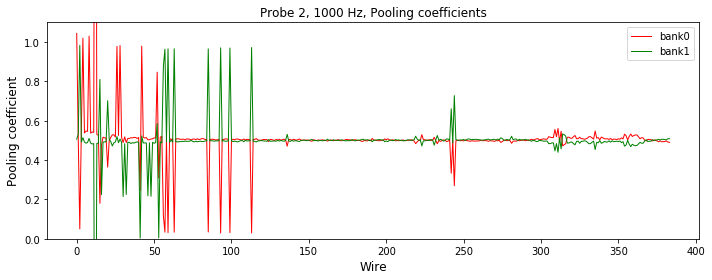

In [6]:
# compute and plot all pooling coeffs 
kf2=getPC('2','1000')
ax=plot([kf2[:,0],kf2[:,1]],fmts=['r-','g-'],linewidth=1,ylim=[0,1.1],
    figsize=(10,4),title='Probe 2, 1000 Hz, Pooling coefficients',legend=['bank0','bank1'],
    xlabel='Wire',ylabel='Pooling coefficient');

## Identify sites with defective switches
We found that this probe contained a few defective switches that did not repond correctly to the control signal. Those sites are recognized by the grossly abnormal pooling coefficients in the graph above. 

Here we identify the "good" sites on Probe 2:

In [7]:
# Mark the sites with pooling coefficients inside [0.4,0.6]
P2_OK=np.logical_and(np.logical_and(kf2[:,0]>0.4,kf2[:,0]<0.6),np.logical_and(kf2[:,1]>0.4,kf2[:,1]<0.6))
print(len(np.where(P2_OK==True)[0]),'good sites')

356 good sites


## Plot the pooling coefficients at the good sites

### Figure 4D

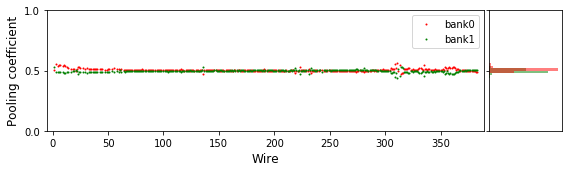

In [8]:
# Plot pooling coeffs at good sites
kf2=getPC('2','1000')
wire=np.arange(384)
fig,axes=plt.subplots(1,2,figsize=(8,2.5),gridspec_kw={'width_ratios':[6, 1]})
plot(wire[P2_OK],[kf2[P2_OK,0],kf2[P2_OK,1]],fmts=['r.','g.'],markersize=2,
    xlabel='Wire',ylabel='Pooling coefficient',
    legend=['bank0','bank1'],loc='upper right',xlim=[-5,389],ylim=[0.0,1.0],
    yticks=[0,0.5,1],axes=axes[0]);
hist([kf2[P2_OK,0],kf2[P2_OK,1]],bins=np.arange(0,1.1,0.02),
    orientation='horizontal',xhide=True,yhide=False,
    ylim=[0.0,1.0],yticks=[0,0.5,1],axes=axes[1]);
axes[1].tick_params(labelleft=False) 
fig.subplots_adjust(wspace=0.02)
plt.savefig('figs/PoolCoeffsProbe2.pdf')

# Electrical characteristics measured in saline 

## Load raw Neuropixel recordings and compute power spectra
This routine is included for reference only. It simply applies a power spectral analysis to each channel of the Neuropixels output.

The input to this routine is not included in this repo because too voluminous.

The output power spectra are provided.

In [9]:
# Load raw data and compute spectrum for each site. This will not run, provided for reference only!
# def pow_all_P2(conc,bank):
#     '''
#     compute power spectra for all sites on Probe 2
#     conc=concentration
#     bank=bank
#     '''
#     binFullPath=Path(getFileNameP2(conc,bank)) # probe 2
#     meta=readMeta(binFullPath) # get metadata
#     rawData = makeMemMapRaw(binFullPath, meta)
#     sRate=SampRate(meta) # get sampling rate (in Hz)
#     tStart=10        # in seconds
#     tEnd=60
#     pa=[]
#     for i in range(384):
#         chanList = [i] # channels to load
#         selectData=rawData[chanList,int(tStart*sRate):int(tEnd*sRate)]
#         if meta['typeThis'] == 'imec':
#             convData=GainCorrectIM(selectData, chanList, meta) # apply gain correction and convert to units of V
#         x=convData[0]  
#         fr,po=signal.welch(x,sRate,nperseg=4096) # set of frequencies and power spectral density
#         pa+=[po]
#     with open('Probe2/NoiseSpectrum_p2_c'+conc+'_b'+bank, "wb") as f: 
#         pickle.dump((fr,pa),f)

In [10]:
# # compute spectra for all concentrations and banks, one file each
# for conc in ['-3','-2','-1','0','1']: # log_10 of saline concentration
#     for bank in ['0','1','01']: # split bank 0, split bank 1, pooled
#         pow_all_P2(conc,bank)

## Fit a 4-parameter circuit model to the noise spectra

The goal here is to infer the values of the components in the above circuit from the RMS noise measurements observed at the output ($U$) under the different conditions: 5 saline concentrations and 3 switch settings.

The assumptions are:
- The source of the noise is thermal noise in $R_0$ and $R_1$ and electronic noise $N_\rm{amp}$.
- $R_0$ and $R_1$ vary in inverse proportion to the saline concentration.
- $C_0$ and $C_1$ are such that at normal saline the electrode impedance is the spec value of 170 kohm.
- $R_\rm{S}$ is infinite, i.e. the shunt impedance is entirely capacitive.

With these assumptions there are only 4 free parameters of the model: $R_0$ and $R_1$ in normal saline, $C_\rm{S}$ and $N_\rm{amp}$. Those 4 parameters are optimized to fit the 15 noise measurements by minimizing the squared error. 

In [11]:
# Some useful global numbers
c=np.array([0.001,0.01,0.1,1,10]) # concentrations
fLo=300 # low end of frequency band to be fit, in Hz
fHi=10000 # high end of frequency band to be fit, in Hz
re=1.5e5 # spec impedance of each electrode at f = 1 kHz, in ohm
om1kHz=2*np.pi*1e3 # radial frequency at f = 1 kHz, in s^-1
kT=4.1e-21 # kT in J

In [12]:
# Load noise power spectra for probe 2 and integrate to get RMS noise
no=np.zeros((5,3,384)) # 5 concentrations, 3 switch conditions, 384 sites
for i,conc in enumerate(['-3','-2','-1','0','1']):
    for j,bank in enumerate(['0','1','01']):
        with open('data/Probe2/NoiseSpectrum_p2_c'+conc+'_b'+bank, "rb") as f: # load spectra from files
            fd,p=pickle.load(f)
        p=np.array(p)
        no[i,j]=np.sqrt(np.sum(p[:,np.logical_and(fd>=fLo,fd<fHi)],axis=-1)*(fd[1]-fd[0])) # integrate over the AP band to get RMS noise

In [13]:
# More useful global numbers
fr=fd[np.logical_and(fd>=fLo,fd<fHi)] # frequencies where to simulate the power (same as in the measured spectra)
om=2*np.pi*fr # corresponding radial frequencies
df=fd[1]-fd[0] # delta f between frequencies

In [14]:
def par(x,y):
    '''
    return impedance of parallel impedances x and y
    '''
    return x*y/(x+y)

In [15]:
def noi6(r0,r1,cs,c0,c1):
    '''
    Simulates the 5-component circuit for one set of the parameters
    Computes the Johnson noise for the two split modes and the pooled mode
    Inputs in ohm and F
    Outputs in V
    '''
    z0=r0+1/(1j*om*c0) # complex impedance electrode 0
    z1=r1+1/(1j*om*c1) # complex impedance electrode 1
    zs=1/(1j*om*cs) # complex impedance shunt
    k00=1/(1+z0/zs) # gain for input to R0 in split 0 recording
    k11=1/(1+z1/zs) # gain for input to R1 in split 1 recording
    k0p=1/(1+z0/par(z1,zs)) # gain for input to R0 in pooled recording
    k1p=1/(1+z1/par(z0,zs)) # gain for input to R1 in pooled recording
    v0=np.sqrt(sum(4*kT*(r0*abs(k00)**2))*df) # integrate Johnson noise spectrum in mode split 0
    v1=np.sqrt(sum(4*kT*(r1*abs(k11)**2))*df) # integrate Johnson noise spectrum in mode split 1
    v01=np.sqrt(sum(4*kT*(r0*abs(k0p)**2+r1*abs(k1p)**2))*df) # integrate Johnson noise spectrum in pooled mode
    return v0,v1,v01 # return the RMS noise for each mode
    
def eval6(x):
    '''
    Evaluates a 4-parameter circuit model. 
    Computes the RMS noise in the two split modes and in pooled mode for all saline concentrations.
    x = [r0,r1,cs,vc] = the model parameters
    Input: resistors in Mohm, capacitors in pF, common noise in uV
    Output: 5x3 array with RMS noise in V vs concentration and mode
    '''
    r0=x[0]*1e6 # R_0 at concn = 1, scale to SI units
    r1=x[1]*1e6 # R_1 at concn = 1
    cs=x[2]*1e-12 # C_s, the shunt capacitance
    vc=x[3]*1e-6 # N_amp, the electronic noise
    c0=1/om1kHz/np.sqrt(re**2-r0**2) # choose C0 in F to make R_ele0 = re
    c1=1/om1kHz/np.sqrt(re**2-r1**2) # choose C1 in F to make R_ele1 = re
    v=np.zeros((5,3))    
    for i,co in enumerate(c): # for each concentration
        r0c=r0/co # compute the resistors
        r1c=r1/co
        v[i]=noi6(r0c,r1c,cs,c0,c1) # get the Johnson noise
        v[i]=np.sqrt(v[i]**2+vc**2) # add the electronic noise in quadrature
    return v # return one (5,3) array of RMS noise

def fit6(x,j):
    '''
    Returns the squared error between predicted and observed noise
    x = [r0,r1,cs,vc] = the model parameters
    j = site number on the array
    Input: resistors in Mohm, common noise in uV
    Output: error in uV**2
    '''
    v=eval6(x) # (5,3) array of predicted RMS noise
    err=np.sum((no[:,:,j]-v)**2) # compare to measured noise
    return err*1e12 # error in µV^2

In [16]:
# Perform 4-parameter circuit fits to all 384 sites. This takes a little while to run...
par6=np.zeros((384,4)) # store best-fit parameters in this array
err6=np.zeros(384) # store errors
for j in range(384):
    res=minimize(fun=fit6, x0=(0.01,0.01,8,6.0), # minimize squared error
             args=(j), method = 'L-BFGS-B',jac=None, hess=None, hessp=None, 
             bounds=[(1e-8,re/1e6-1e-8),(1e-8,re/1e6-1e-8),(1e-8,None),(1e-8,None)], 
             constraints=(), tol=None, callback=None, options=None)
    par6[j]=res.x  
    err6[j]=res.fun
    print(j,end=',')
with open('data/Probe2/2R1Crms_P2', 'wb') as f: # save parameters and fit errors to file
        pickle.dump((par6,err6),f)

## Examples of noise measurements and fits from the circuit model

In [17]:
# Load 2R1C circuit parameters for Probe 2
with open('data/Probe2/2R1Crms_P2', 'rb') as f:
    pa,er=pickle.load(f)

In [18]:
# Load data for rms noise probe 2
no=np.zeros((5,3,384))
for i,conc in enumerate(['-3','-2','-1','0','1']):
    for j,bank in enumerate(['0','1','01']):
        with open('data/Probe2/NoiseSpectrum_p2_c'+conc+'_b'+bank, "rb") as f: 
            fd,p=pickle.load(f)
        p=np.array(p)
        no[i,j]=np.sqrt(np.sum(p[:,np.logical_and(fd>=fLo,fd<fHi)],axis=-1)*(fd[1]-fd[0])) # rms noise
fr=fd[np.logical_and(fd>=fLo,fd<fHi)] # frequencies where to evaluate the power
om=2*np.pi*fr
df=fd[1]-fd[0]

In [19]:
def plotFitFig(j):
    '''
    Plots RMS noise vs saline concentration for site number j, in the 2 split conditions and pooled
    ALso plots predictions from the 4-parameter circuit model for that site
    assumes no[:,:,j] = RMS noise data, pa[j] = parameters, and eval6(pa[j]) = the fit, c = concentrations
    '''
    fdata=['ro','g+','bs']
    ffit=['r-','g-','b-']
    td=no[:,:,j]*1e6
    tf=eval6(pa[j])*1e6
    ax=plot(c,[td[:,0],td[:,1],td[:,2]],fmts=fdata,xscale='log',figsize=(3,3),fillstyle='none');
    plot(c,[tf[:,0],tf[:,1],tf[:,2]],fmts=ffit,xscale='log',axes=ax,
        xlabel='Saline concentration',ylabel='RMS noise (µV)',
        legend=['split 0','split 1','pooled'],xticks=[1e-3,1e-2,1e-1,1,10],
        ylim=[0,25]);
    plt.minorticks_off()
    plt.savefig('figs/PowerVsConc{:03d}.pdf'.format(j))

### Figure 4B left

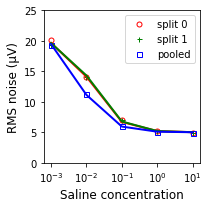

In [20]:
plotFitFig(19)

### Figure 4B right

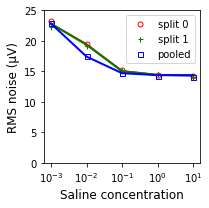

In [21]:
plotFitFig(353)

## Noise in the highest saline, bank 1 vs bank 2

### Figure 4C

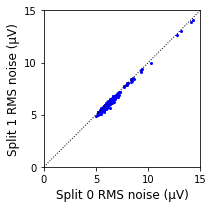

In [22]:
# Noise in 10x saline split 1 vs split 0. Limit to sites with OK switches.
ax=plot(no[4,0,P2_OK]*1e6,no[4,2,P2_OK]*1e6,fmts=['bo'],markersize=2,equal=True);
x=[0,15]
plot(x,x,fmts=['k:'],linewidth=1,axes=ax,
     xlabel='Split 0 RMS noise (µV)',ylabel='Split 1 RMS noise (µV)',xlim=[0,15],ylim=[0,15],
    xticks=[0,5,10,15],yticks=[0,5,10,15]);
plt.savefig('figs/Noise10xSaline.pdf')

## Histograms of the parameters in the circuit model

Histogram the 4 parameters of the circuit model for Probe 2. 

Limit this to sites with 
- functioning switches and 
- a good fit with small residual error.

### Figure 8B

Histograms over 349 sites


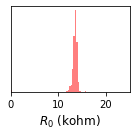

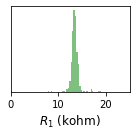

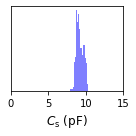

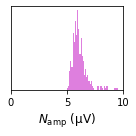

In [23]:
# Probe 2, rms noise, 2R1C circuit model, sites with err<4 and OK switches
with open('data/Probe2/2R1Crms_P2', 'rb') as f:
    p,e=pickle.load(f)
OK=np.logical_and(P2_OK,e<4)
print('Histograms over {} sites'.format(len(np.where(OK==True)[0])))
hist(p[OK,0]*1000,bins=np.arange(100)*0.3,xlabel='$R_0$ (kohm)',color='red',xlim=[0,25],figsize=(2,2),yhide=True);
plt.savefig('figs/P2_R0_Hist.pdf')
plt.show()
hist(p[OK,1]*1000,bins=np.arange(100)*0.3,xlabel='$R_1$ (kohm)',color='green',xlim=[0,25],figsize=(2,2),yhide=True);
plt.savefig('figs/P2_R1_Hist.pdf')
plt.show()
hist(p[OK,2],bins=np.arange(100)*0.15,xlabel='$C_{\mathrm{s}}$ (pF)',color='blue',xlim=[0,15],figsize=(2,2),
     yhide=True,xticks=[0,5,10,15]);
plt.savefig('figs/P2_Cs_Hist.pdf')
plt.show()
hist(p[OK,3],bins=np.arange(100)*0.1,xlabel='$N_{\mathrm{amp}}$ (µV)',color='magenta',xlim=[0,10],figsize=(2,2),yhide=True);
plt.savefig('figs/P2_Na_Hist.pdf')
plt.show()